In [30]:
#Import dependencies
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set style for plots
sns.set_style("whitegrid")

# Connect to the SQLite database
conn = sqlite3.connect("market_data.db")



### Define the inauguration periods and reusable functions

In [32]:
# Define 2-month windows after each inauguration
inaugurations = {
    "Obama_2013": ("2013-01-20", "2013-03-20"),
    "Trump_2017": ("2017-01-20", "2017-03-20"),
    "Biden_2021": ("2021-01-20", "2021-03-20"),
    "Trump_2025": ("2025-01-20", "2025-03-20")
}

# Reusable function to get clean data for any asset table
def get_inauguration_window_data(table_name):
    all_data = []

    for pres, (start, end) in inaugurations.items():
        query = f"""
        SELECT date, close
        FROM {table_name}
        WHERE date BETWEEN '{start}' AND '{end}'
        ORDER BY date
        """
        df = pd.read_sql(query, conn)
        df["date"] = pd.to_datetime(df["date"])
        df["president"] = pres
        df["day_number"] = (df["date"] - df["date"].min()).dt.days
        all_data.append(df)

    return pd.concat(all_data, ignore_index=True)

# Reusable plot function
def plot_inauguration_comparison(df, title, color_palette="Set1"):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x="day_number", y="close", hue="president", palette=color_palette)
    plt.title(title)
    plt.xlabel("Days Since Inauguration")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()


### Generate plots by asset

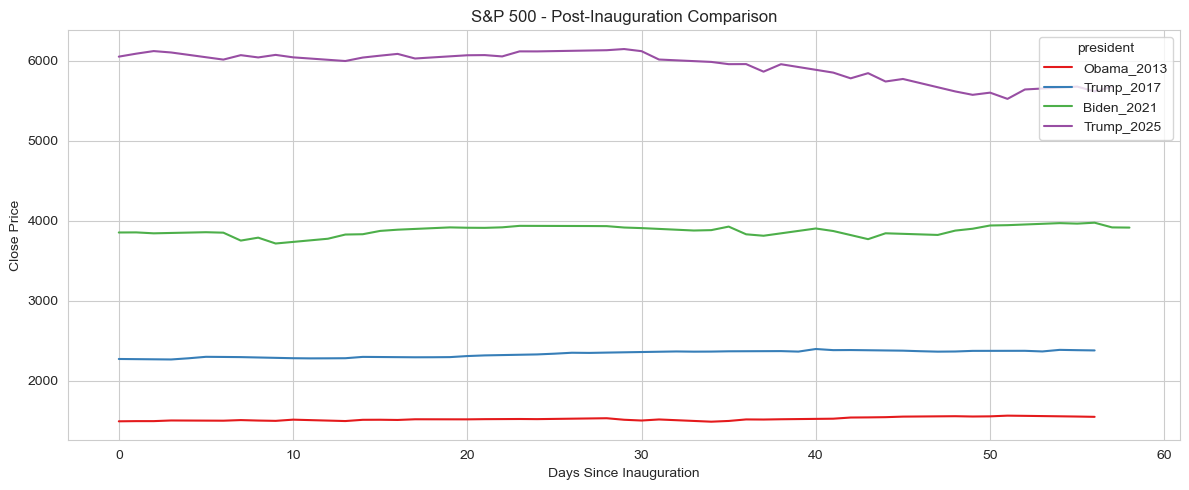

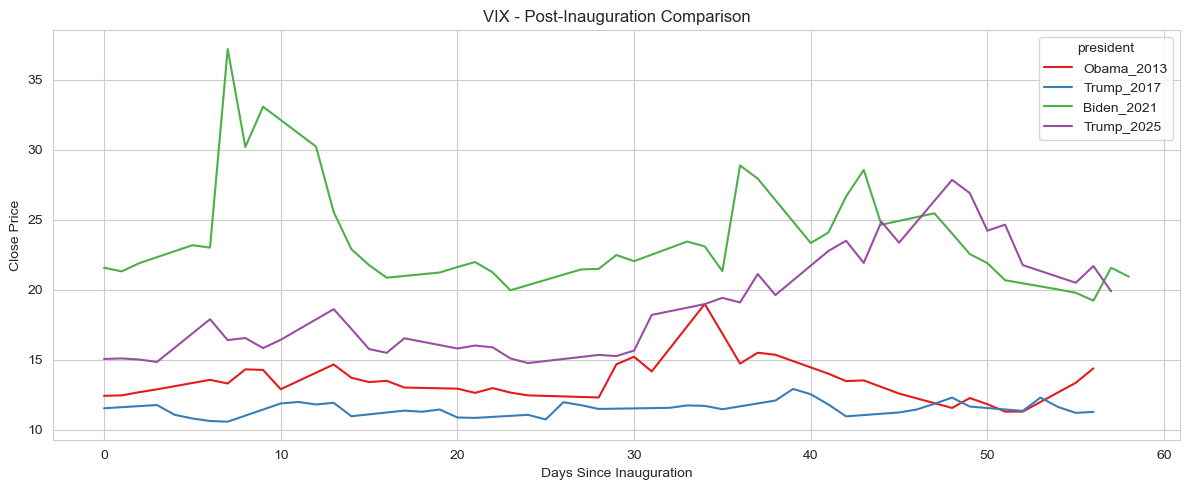

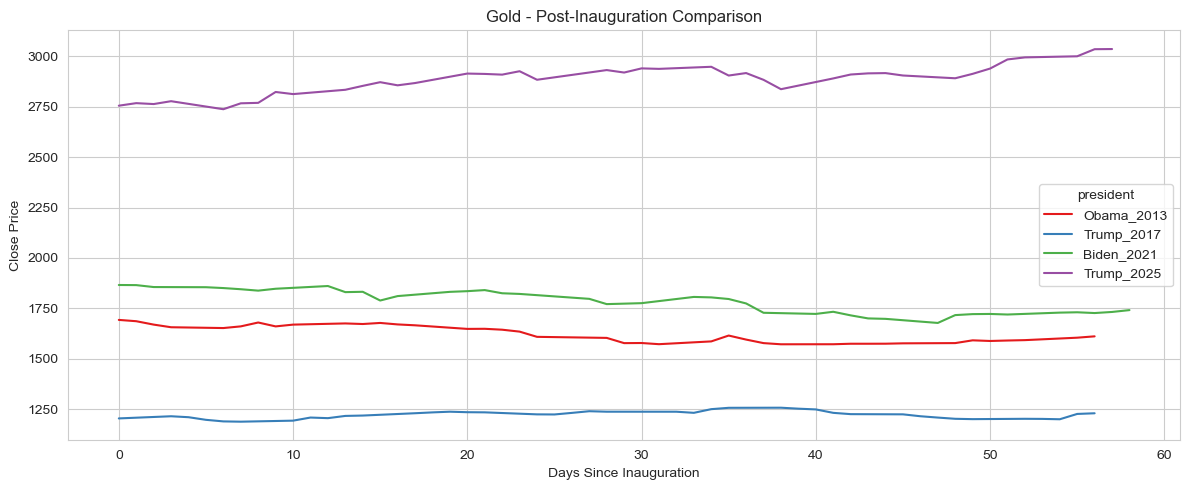

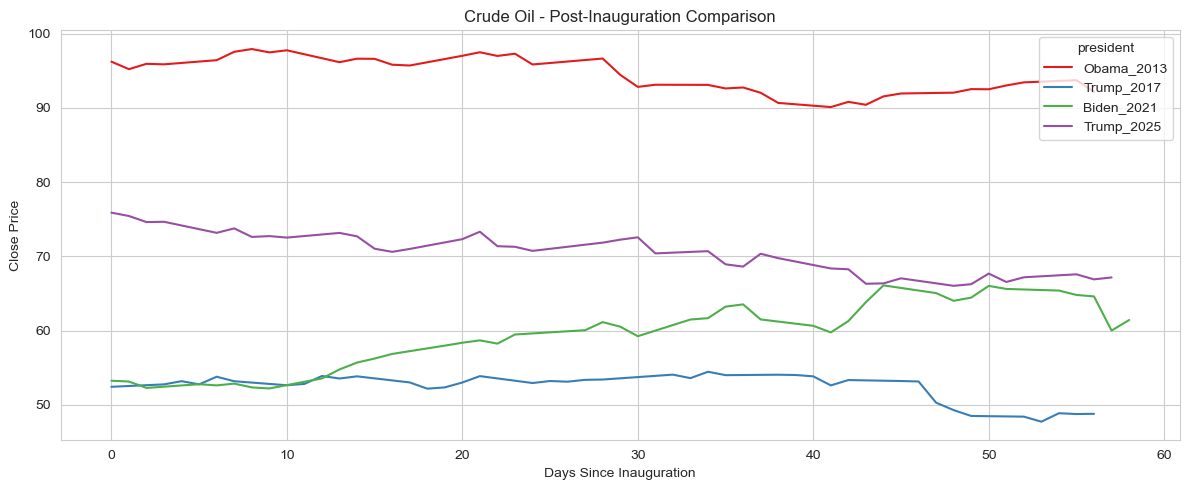

In [33]:
df_sp500 = get_inauguration_window_data("sp500")
plot_inauguration_comparison(df_sp500, "S&P 500 - Post-Inauguration Comparison")

df_vix = get_inauguration_window_data("vix")
plot_inauguration_comparison(df_vix, "VIX - Post-Inauguration Comparison")

df_gold = get_inauguration_window_data("gold")
plot_inauguration_comparison(df_gold, "Gold - Post-Inauguration Comparison")

df_oil = get_inauguration_window_data("oil")
plot_inauguration_comparison(df_oil, "Crude Oil - Post-Inauguration Comparison")


### Create a Percent Change Table - % Change in closing price from Day 0 to Day 59

In [34]:
def calculate_percent_change(table_name):
    results = []

    for pres, (start, end) in inaugurations.items():
        query = f"""
        SELECT date, close
        FROM {table_name}
        WHERE date BETWEEN '{start}' AND '{end}'
        ORDER BY date
        """
        df = pd.read_sql(query, conn)
        df["date"] = pd.to_datetime(df["date"])
        df.dropna(subset=["close"], inplace=True)

        if len(df) > 1:
            first = df["close"].iloc[0]
            last = df["close"].iloc[-1]
            change = ((last - first) / first) * 100
            results.append({"president": pres, "percent_change": round(change, 2)})
        else:
            results.append({"president": pres, "percent_change": None})

    return pd.DataFrame(results)

# Run for each asset
assets = {
    "S&P 500": "sp500",
    "VIX": "vix",
    "Gold": "gold",
    "Crude Oil": "oil"
}

summary_df = pd.DataFrame()

for asset_name, table in assets.items():
    df = calculate_percent_change(table)
    df.rename(columns={"percent_change": asset_name}, inplace=True)
    if summary_df.empty:
        summary_df = df
    else:
        summary_df = pd.merge(summary_df, df, on="president")

summary_df.set_index("president", inplace=True)
summary_df


,S&P 500,VIX,Gold,Crude Oil
president,,,,
Obama_2013,3.74,15.77,-4.81,-4.24
Trump_2017,4.71,-2.25,2.12,-6.94
Biden_2021,1.59,-2.92,-6.67,15.36
Trump_2025,-6.18,32.14,10.20,-11.50


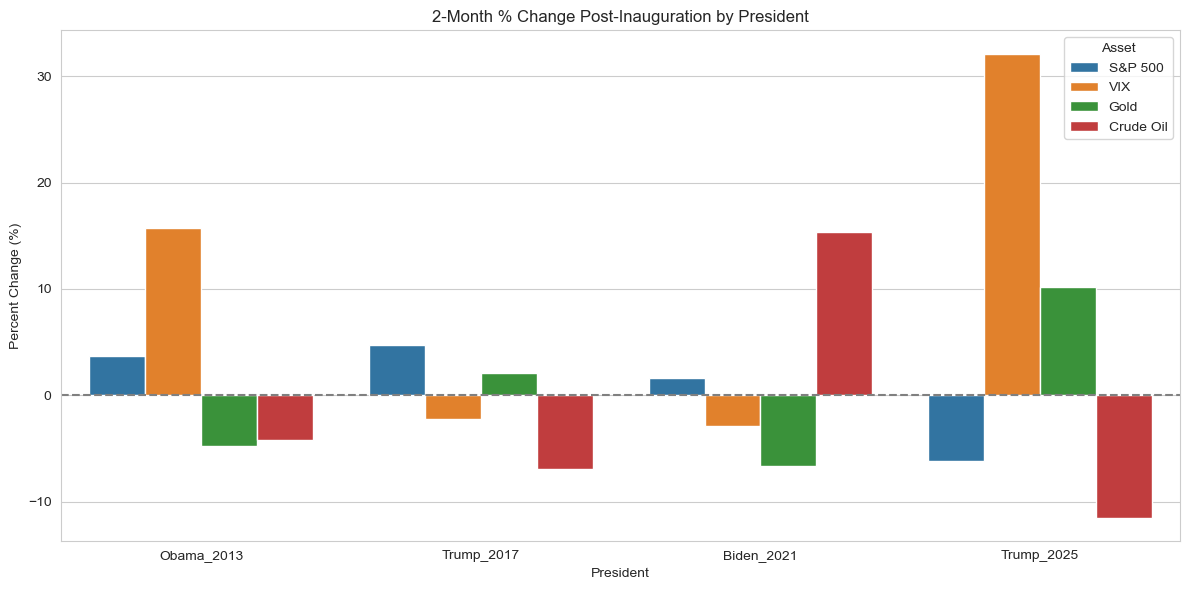

In [35]:
# Bar chart of percent change grouped by president
summary_df_plot = summary_df.reset_index().melt(id_vars="president", var_name="Asset", value_name="Percent Change")

plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df_plot, x="president", y="Percent Change", hue="Asset")
plt.title("2-Month % Change Post-Inauguration by President")
plt.xlabel("President")
plt.ylabel("Percent Change (%)")
plt.axhline(0, color="gray", linestyle="--")
plt.legend(title="Asset")
plt.tight_layout()
plt.show()


### Update Tech Stocks Asset List and Run Analysis

In [36]:
# Run percent change for tech stocks
tech_stocks = {
    "AAPL": "aapl",
    "AMZN": "amzn",
    "MSFT": "msft",
    "NVDA": "nvda",
    "GOOGL": "googl"
}

tech_df = pd.DataFrame()

for stock_name, table in tech_stocks.items():
    df = calculate_percent_change(table)
    df.rename(columns={"percent_change": stock_name}, inplace=True)
    if tech_df.empty:
        tech_df = df
    else:
        tech_df = pd.merge(tech_df, df, on="president")

tech_df.set_index("president", inplace=True)
tech_df


,AAPL,AMZN,MSFT,NVDA,GOOGL
president,,,,,
Obama_2013,-9.44,-5.10,4.65,3.60,15.43
Trump_2017,17.16,5.44,4.02,2.11,5.34
Biden_2021,-8.98,-5.77,2.92,-3.86,7.81
Trump_2025,-3.22,-15.24,-9.31,-16.54,-17.15


### Bar Chart of Tech Stock % Change

/var/folders/ps/sp5q9jd96x1c9mcvvq_4_y100000gp/T/ipykernel_24219/912349118.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


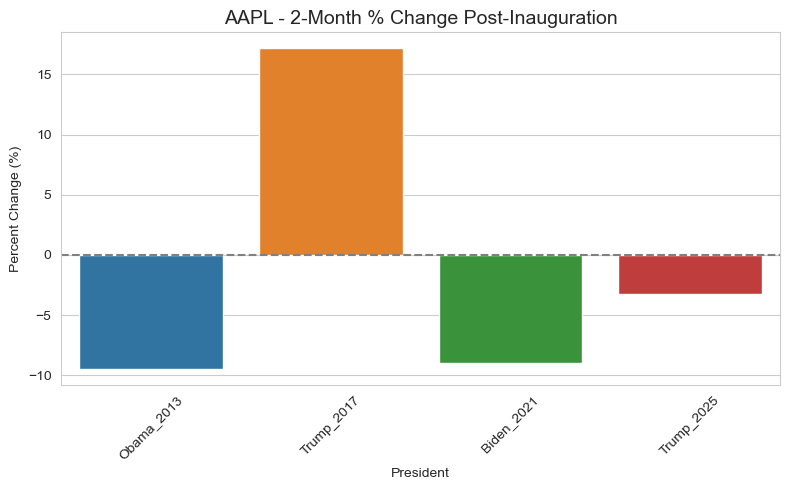

/var/folders/ps/sp5q9jd96x1c9mcvvq_4_y100000gp/T/ipykernel_24219/912349118.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


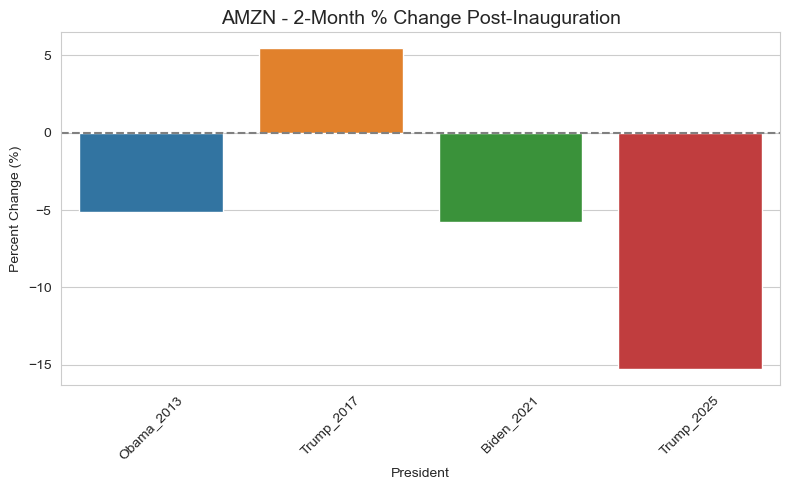

/var/folders/ps/sp5q9jd96x1c9mcvvq_4_y100000gp/T/ipykernel_24219/912349118.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


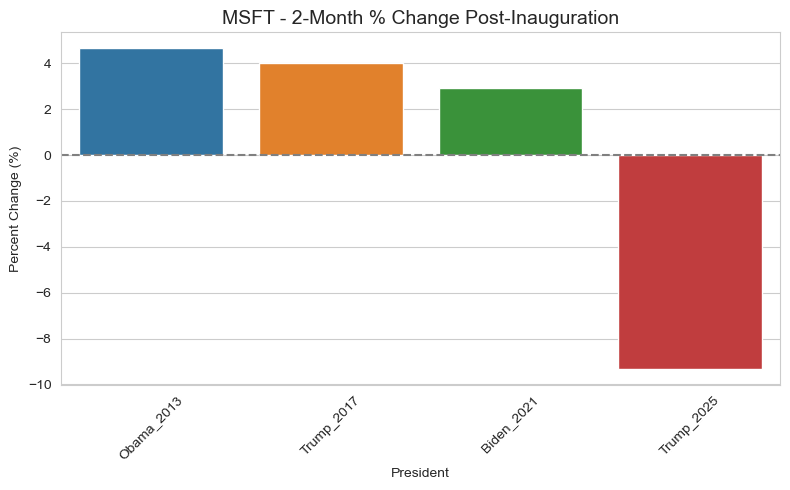

/var/folders/ps/sp5q9jd96x1c9mcvvq_4_y100000gp/T/ipykernel_24219/912349118.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


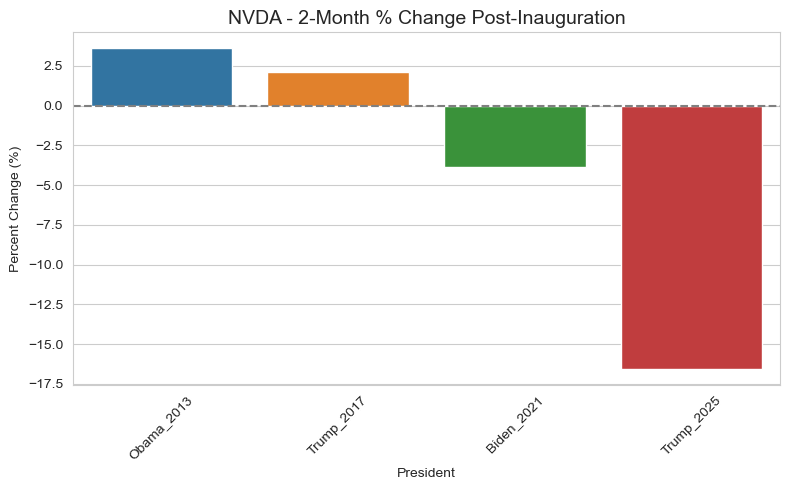

/var/folders/ps/sp5q9jd96x1c9mcvvq_4_y100000gp/T/ipykernel_24219/912349118.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


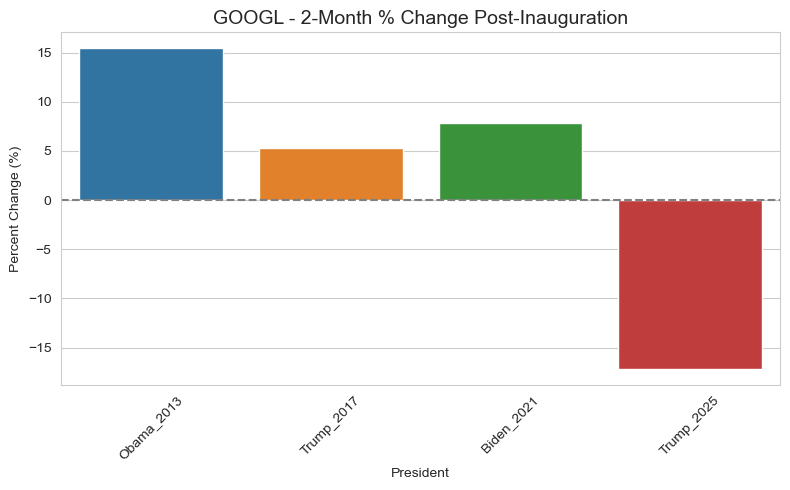

In [40]:
# Set Seaborn style
sns.set_style("whitegrid")

# Custom color palette to keep colors consistent by president)
colors = {
    "Obama_2013": "#1f77b4",
    "Trump_2017": "#ff7f0e",
    "Biden_2021": "#2ca02c",
    "Trump_2025": "#d62728"
}

# Function to plot a bar chart for a single stock
def plot_stock_percent_change(df, stock_name):
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df,
        x="president",
        y="Percent Change",
        palette=colors
    )
    plt.title(f"{stock_name} - 2-Month % Change Post-Inauguration", fontsize=14)
    plt.ylabel("Percent Change (%)")
    plt.xlabel("President")
    plt.axhline(0, color="gray", linestyle="--")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Loop through each tech stock and create a separate bar chart
for stock in tech_plot_df["Stock"].unique():
    stock_df = tech_plot_df[tech_plot_df["Stock"] == stock]
    plot_stock_percent_change(stock_df, stock)


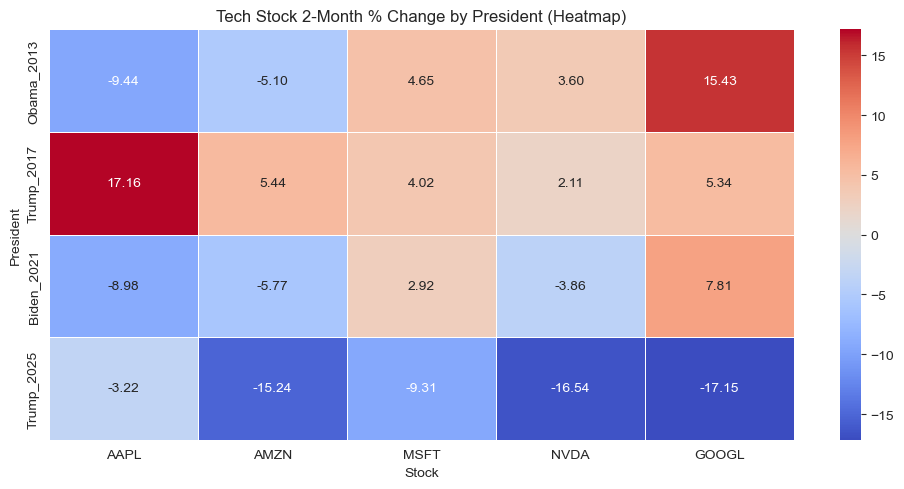

In [18]:
# Heatmap of percent changes
plt.figure(figsize=(10, 5))
sns.heatmap(tech_df, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Tech Stock 2-Month % Change by President (Heatmap)")
plt.xlabel("Stock")
plt.ylabel("President")
plt.tight_layout()
plt.show()


Dropdown(description='Select Plot:', options=('S&P 500 - Line Chart', 'VIX - Line Chart', 'Gold - Line Chart',…

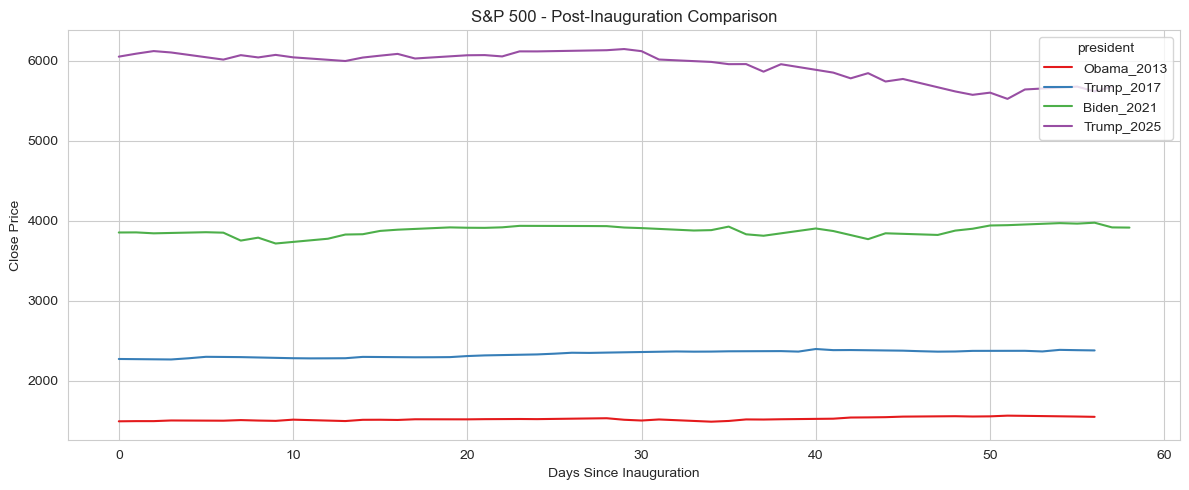

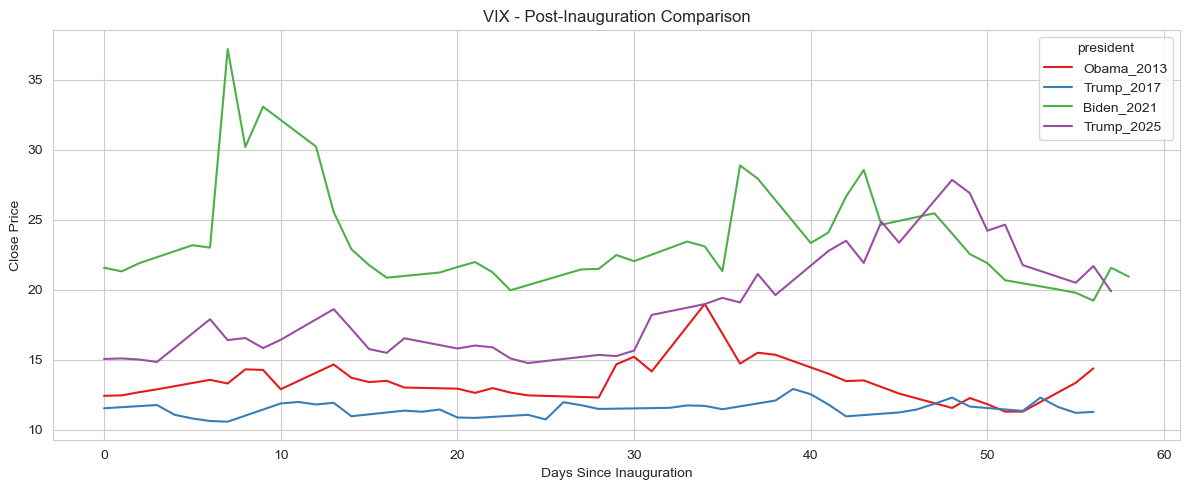

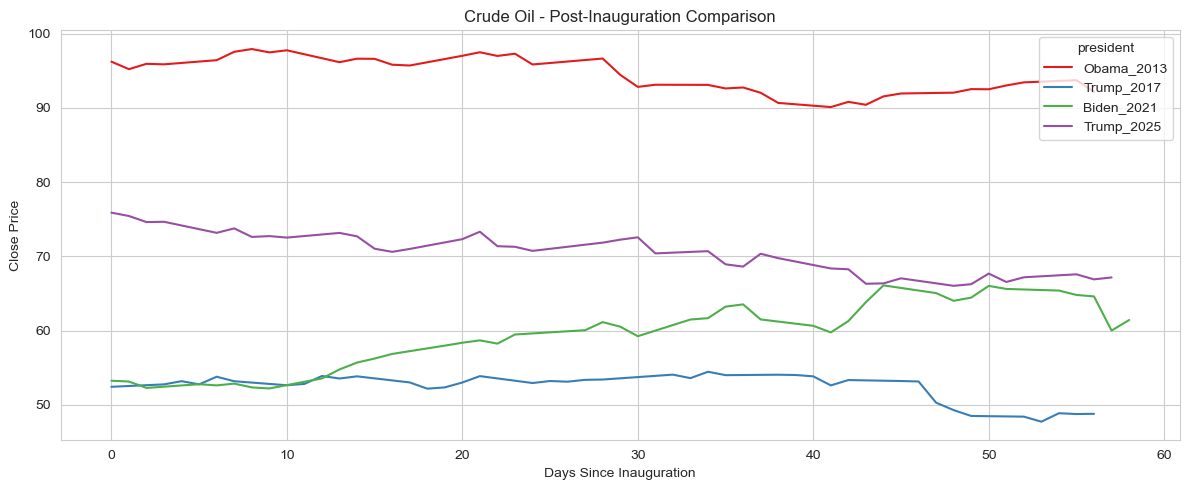

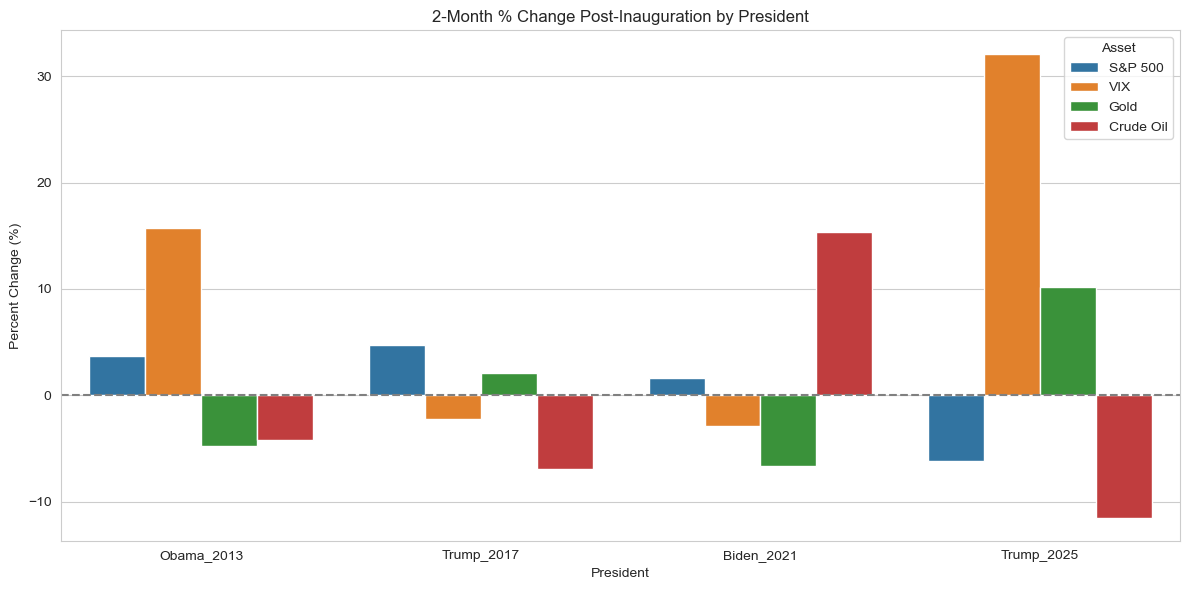

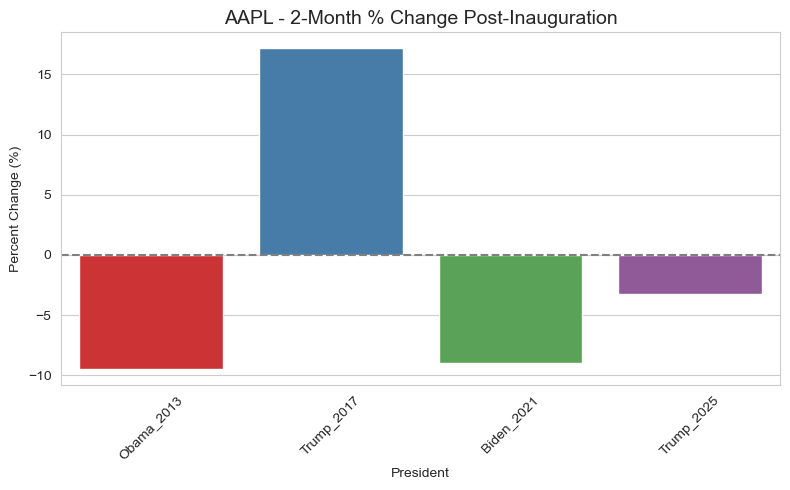

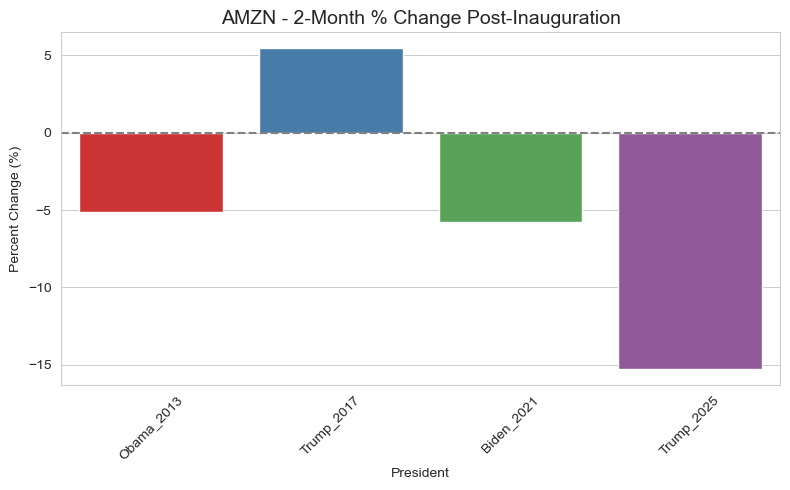

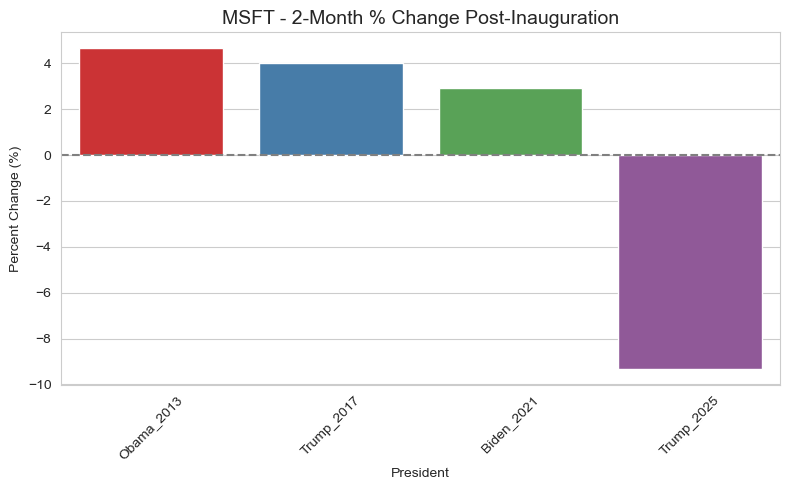

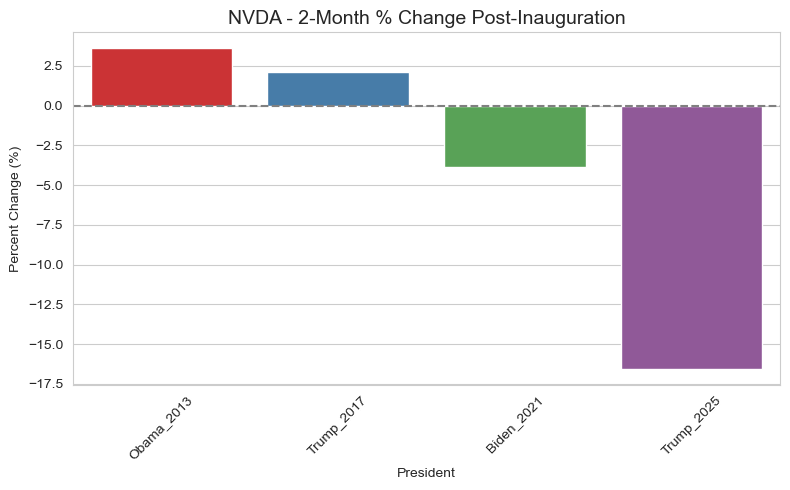

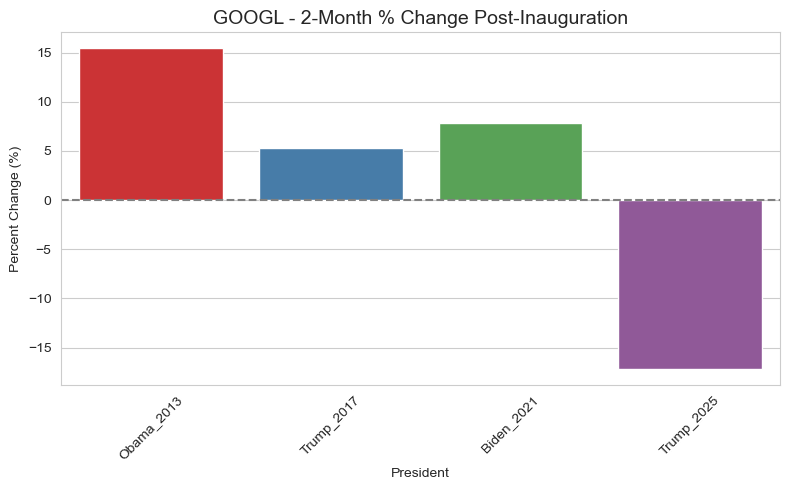

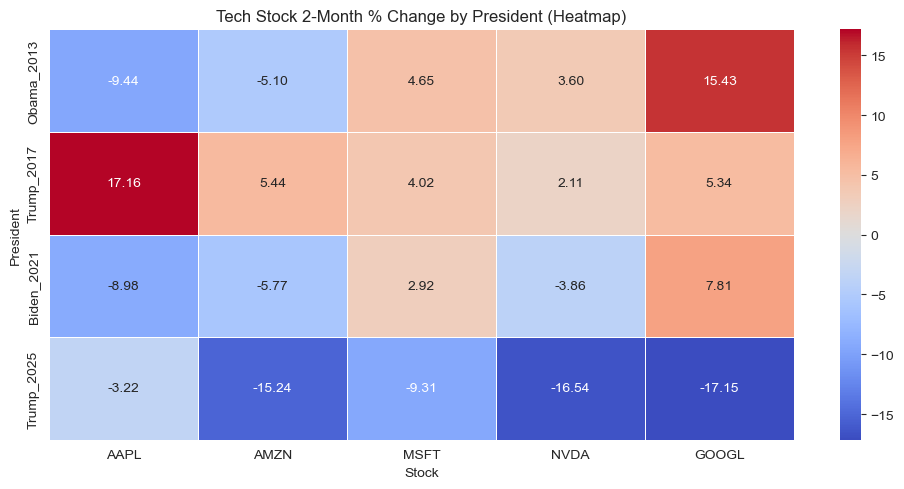

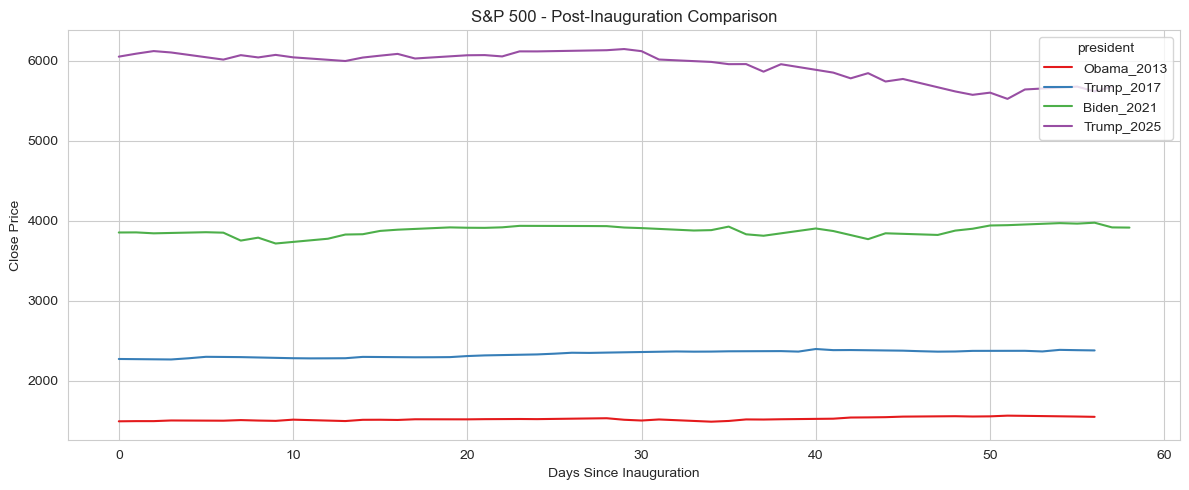

In [2]:
# Import dependencies
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Set style for plots
sns.set_style("whitegrid")

# Connect to the SQLite database
conn = sqlite3.connect("market_data.db")

# Define 2-month windows after each inauguration
inaugurations = {
    "Obama_2013": ("2013-01-20", "2013-03-20"),
    "Trump_2017": ("2017-01-20", "2017-03-20"),
    "Biden_2021": ("2021-01-20", "2021-03-20"),
    "Trump_2025": ("2025-01-20", "2025-03-20")
}

# Reusable function to get clean data for any asset table
def get_inauguration_window_data(table_name, selected_presidents):
    all_data = []
    for pres, (start, end) in inaugurations.items():
        if pres not in selected_presidents:
            continue
        query = f"""
        SELECT date, close
        FROM {table_name}
        WHERE date BETWEEN '{start}' AND '{end}'
        ORDER BY date
        """
        df = pd.read_sql(query, conn)
        df["date"] = pd.to_datetime(df["date"])
        df["president"] = pres
        df["day_number"] = (df["date"] - df["date"].min()).dt.days
        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Reusable plot function for line chart
def plot_inauguration_comparison(df, title, color_palette="Set1"):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x="day_number", y="close", hue="president", palette=color_palette)
    plt.title(title)
    plt.xlabel("Days Since Inauguration")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()

# Function to calculate percent change for each asset
def calculate_percent_change(table_name):
    results = []
    for pres, (start, end) in inaugurations.items():
        query = f"""
        SELECT date, close
        FROM {table_name}
        WHERE date BETWEEN '{start}' AND '{end}'
        ORDER BY date
        """
        df = pd.read_sql(query, conn)
        df["date"] = pd.to_datetime(df["date"])
        df.dropna(subset=["close"], inplace=True)
        if len(df) > 1:
            first = df["close"].iloc[0]
            last = df["close"].iloc[-1]
            change = ((last - first) / first) * 100
            results.append({"president": pres, "percent_change": round(change, 2)})
        else:
            results.append({"president": pres, "percent_change": None})
    return pd.DataFrame(results)

# Run percent change for each asset
assets = {
    "S&P 500": "sp500",
    "VIX": "vix",
    "Gold": "gold",
    "Crude Oil": "oil"
}

summary_df = pd.DataFrame()

for asset_name, table in assets.items():
    df = calculate_percent_change(table)
    df.rename(columns={"percent_change": asset_name}, inplace=True)
    if summary_df.empty:
        summary_df = df
    else:
        summary_df = pd.merge(summary_df, df, on="president")

summary_df.set_index("president", inplace=True)

# Function to plot the bar chart of percent change grouped by president
def plot_bar_chart_percent_change():
    summary_df_plot = summary_df.reset_index().melt(id_vars="president", var_name="Asset", value_name="Percent Change")
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary_df_plot, x="president", y="Percent Change", hue="Asset")
    plt.title("2-Month % Change Post-Inauguration by President")
    plt.xlabel("President")
    plt.ylabel("Percent Change (%)")
    plt.axhline(0, color="gray", linestyle="--")
    plt.legend(title="Asset")
    plt.tight_layout()
    plt.show()

# Run percent change for tech stocks
tech_stocks = {
    "AAPL": "aapl",
    "AMZN": "amzn",
    "MSFT": "msft",
    "NVDA": "nvda",
    "GOOGL": "googl"
}

tech_df = pd.DataFrame()

for stock_name, table in tech_stocks.items():
    df = calculate_percent_change(table)
    df.rename(columns={"percent_change": stock_name}, inplace=True)
    if tech_df.empty:
        tech_df = df
    else:
        tech_df = pd.merge(tech_df, df, on="president")

tech_df.set_index("president", inplace=True)

# Function to plot bar chart for a single stock
def plot_stock_percent_change(df, stock_name):
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df,
        x="president",
        y=stock_name,
        palette="Set1"
    )
    plt.title(f"{stock_name} - 2-Month % Change Post-Inauguration", fontsize=14)
    plt.ylabel("Percent Change (%)")
    plt.xlabel("President")
    plt.axhline(0, color="gray", linestyle="--")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot heatmap for tech stocks
def plot_tech_heatmap():
    plt.figure(figsize=(10, 5))
    sns.heatmap(tech_df, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
    plt.title("Tech Stock 2-Month % Change by President (Heatmap)")
    plt.xlabel("Stock")
    plt.ylabel("President")
    plt.tight_layout()
    plt.show()

# Dropdown for selecting the type of plot to display
plot_dropdown = widgets.Dropdown(
    options=[
        'S&P 500 - Line Chart',
        'VIX - Line Chart',
        'Gold - Line Chart',
        'Crude Oil - Line Chart',
        '2-Month % Change Post-Inauguration (Bar Chart)',
        'Tech Stock % Change (Bar Charts)',
        'Tech Stock % Change Heatmap'
    ],
    description='Select Plot:',
    value='S&P 500 - Line Chart'  # Set default selection to S&P 500 chart
)

# Clear the current plot before displaying the new one
def clear_output():
    plt.clf()  # Clear the current figure
    plt.close()  # Close the figure window to ensure it's fully removed

# Function to display the selected plot
def display_selected_plot(change):
    # Clear any previous plots
    clear_output()

    selected_plot = plot_dropdown.value
    if selected_plot == 'S&P 500 - Line Chart':
        df_sp500 = get_inauguration_window_data("sp500", selected_presidents=["Obama_2013", "Trump_2017", "Biden_2021", "Trump_2025"])
        plot_inauguration_comparison(df_sp500, "S&P 500 - Post-Inauguration Comparison")
    elif selected_plot == 'VIX - Line Chart':
        df_vix = get_inauguration_window_data("vix", selected_presidents=["Obama_2013", "Trump_2017", "Biden_2021", "Trump_2025"])
        plot_inauguration_comparison(df_vix, "VIX - Post-Inauguration Comparison")
    elif selected_plot == 'Gold - Line Chart':
        df_gold = get_inauguration_window_data("gold", selected_presidents=["Obama_2013", "Trump_2017", "Biden_2021", "Trump_2025"])
        plot_inauguration_comparison(df_gold, "Gold - Post-Inauguration Comparison")
    elif selected_plot == 'Crude Oil - Line Chart':
        df_oil = get_inauguration_window_data("oil", selected_presidents=["Obama_2013", "Trump_2017", "Biden_2021", "Trump_2025"])
        plot_inauguration_comparison(df_oil, "Crude Oil - Post-Inauguration Comparison")
    elif selected_plot == '2-Month % Change Post-Inauguration (Bar Chart)':
        plot_bar_chart_percent_change()
    elif selected_plot == 'Tech Stock % Change (Bar Charts)':
        for stock in tech_df.columns:
            if stock != 'president':
                plot_stock_percent_change(tech_df, stock)
    elif selected_plot == 'Tech Stock % Change Heatmap':
        plot_tech_heatmap()

# Set up the interactive widget
plot_dropdown.observe(display_selected_plot, names='value')

# Display the dropdown for user interaction
display(plot_dropdown)

# Initial plot display (simulating "init" behavior) by calling the function once to show default plot
display_selected_plot({'new': 'S&P 500 - Line Chart'})
